###**Import the nesecary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [74]:
# Load & Read the Dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Details.csv')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [6]:
# Shape of DataSet
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :7
Number of rows :1500


The Dataset Contains 7 Columns and 1500 Rows

In [75]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [9]:
# Checking for the Null Values in the Dataset
df.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0


In [11]:
# Description about the Dataset
df.describe()


,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [12]:
df.describe(exclude=np.number)

,Order ID,Category,Sub-Category,PaymentMode
count,1500,1500,1500,1500
unique,500,3,17,5
top,B-25656,Clothing,Saree,COD
freq,12,949,211,684


The code **df.describe(exclude=np.number)** is used in Pandas to generate summary statistics of a DataFrame, excluding numeric columns.

In [14]:
# Checking for duplicated rows:
df.duplicated().sum()

np.int64(0)

In [15]:
# Load & Read the Second Dataset
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/Orders.csv")
df1.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [16]:
# Shape of DataSet
print(f"Number of column :{df1.shape[1]}\nNumber of rows :{df1.shape[0]}")

Number of column :5
Number of rows :500


In [17]:
# Checking for the Null Values in the Dataset
df1.isnull().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0


In [19]:
# Information about the Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [20]:
# Checking for duplicated rows:
df1.duplicated().sum()

np.int64(0)

**Merge the Two Dataset**

In [38]:
# Merge both the dataset
df_merge = pd.merge(
    df,
    df1[['Order ID', 'Order Date', 'CustomerName', 'State', 'City']],
    on='Order ID',
    how='left'
)

In [39]:
df_merge.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date_x,CustomerName_x,State_x,City_x,Order Date_y,CustomerName_y,State_y,City_y
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune,01-04-2018,Vrinda,Maharashtra,Pune


In [40]:
# Drop _y columns and rename _x back to original
df_merge.drop(columns=['Order Date_y', 'CustomerName_y', 'State_y', 'City_y'], inplace=True)
df_merge.rename(columns={
    'Order Date_x': 'Order Date',
    'CustomerName_x': 'CustomerName',
    'State_x': 'State',
    'City_x': 'City'
}, inplace=True)

In [41]:
df_merge.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune


In [42]:
# Shape of DataSet
print(f"Number of column :{df_merge.shape[1]}\nNumber of rows :{df_merge.shape[0]}")

Number of column :11
Number of rows :1500


In [43]:
# Information about the merge Dataset
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


In [44]:
# Description about the merge Dataset
df_merge.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [45]:
df_merge.describe(exclude= np.number)

,Order ID,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
count,1500,1500,1500,1500,1500,1500,1500,1500
unique,500,3,17,5,307,336,19,25
top,B-25656,Clothing,Saree,COD,10-03-2018,Abhishek,Madhya Pradesh,Indore
freq,12,949,211,684,33,21,314,248


The code **df.describe(exclude=np.number)** is used in Pandas to generate summary statistics of a DataFrame, excluding numeric columns.

**Delete Unnecesary Columns**

In [46]:
df_merge.drop(columns = ['Order ID','Order Date'], inplace = True)

In [47]:
df_merge.head()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,CustomerName,State,City
0,1096,658,7,Electronics,Electronic Games,COD,Bhawna,Madhya Pradesh,Indore
1,5729,64,14,Furniture,Chairs,EMI,Harivansh,Uttar Pradesh,Mathura
2,2927,146,8,Furniture,Bookcases,EMI,Shiva,Maharashtra,Pune
3,2847,712,8,Electronics,Printers,Credit Card,Sarita,Maharashtra,Pune
4,2617,1151,4,Electronics,Phones,Credit Card,Vrinda,Maharashtra,Pune


In [48]:
# Shape of DataSet
print(f"Number of column :{df_merge.shape[1]}\nNumber of rows :{df_merge.shape[0]}")

Number of column :9
Number of rows :1500


In [49]:
df_merge.describe(exclude = np.number)

,Category,Sub-Category,PaymentMode,CustomerName,State,City
count,1500,1500,1500,1500,1500,1500
unique,3,17,5,336,19,25
top,Clothing,Saree,COD,Abhishek,Madhya Pradesh,Indore
freq,949,211,684,21,314,248


###**Visualization**

**Category**

In [51]:
print(f"number of Categories '{df_merge['Category'].nunique()}'")

number of Categories '3'


In [52]:
# Categories in the Dataset
category = df_merge['Category'].value_counts()
category

,count
Category,
Clothing,949
Electronics,308
Furniture,243


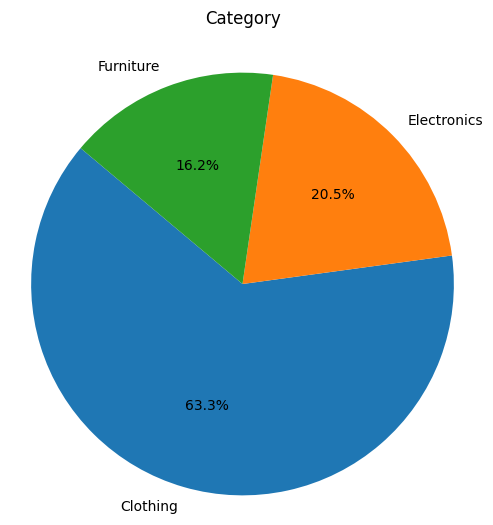

In [57]:
# Plot the pie chart of Categories
category = [949, 308, 243]
labels = ['Clothing', 'Electronics', 'Furniture']


# Plot
plt.figure(figsize=(6, 6))
plt.pie(category, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Category\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

The Pie Chart shows that **Clothing** categories have most of the share, then **Elctronics** and then **Furniture** in the category

**Sub-Category**

In [58]:
print(f"number of Sub_Categories '{df_merge['Sub-Category'].nunique()}'")

number of Sub_Categories '17'


In [59]:
# Count of sub-categories in the Dataset
Sub_Category = df_merge['Sub-Category'].value_counts()
Sub_Category

,count
Sub-Category,
Saree,211
Hankerchief,197
Stole,192
Phones,83
Electronic Games,79
Bookcases,79
T-shirt,77
Printers,74
Chairs,74


In [61]:
Sub_Category = df_merge['Sub-Category'].value_counts().reset_index()
Sub_Category.columns = ['Sub-Category', 'Count']

In [62]:
# Ploting the Bar plot in Sub-Categories
fig = px.bar(
    Sub_Category,
    x='Sub-Category',
    y='Count',
    text_auto=True,
    title='Sub Categories',
    color_discrete_sequence=["#8c0404"]
)
fig.update_xaxes(type='category')
fig.show()


**PaymentMode**

In [63]:
print(f"number of PaymentMode '{df_merge['PaymentMode'].nunique()}'")

number of PaymentMode '5'


In [64]:
# Different Types of Payment Mode
PaymentMode = df['PaymentMode'].value_counts()
PaymentMode

,count
PaymentMode,
COD,684
UPI,331
Debit Card,202
Credit Card,163
EMI,120


In [67]:
# Plot the Bar Chart of Payment Mode
fig = px.bar(
    PaymentMode,
    x='PaymentMode',
    y='Count',
    text_auto=True,
    title='Payment Mode',
    color_discrete_sequence=["#00CED1"]
)

fig.update_xaxes(type='category')
fig.show()


The graph indicates that people prefer **Cash on Delivery (COD)** as their payment method, followed by **UPI**, **Debit Card**, **Credit Card**, and finally **EMI** options.

**State**

In [68]:
print(f"number of States '{df_merge['State'].nunique()}'")

number of States '19'


In [69]:
# State
State = df_merge['State'].value_counts()
State

,count
State,
Madhya Pradesh,314
Maharashtra,299
Uttar Pradesh,87
Gujarat,87
Delhi,76
Rajasthan,74
West Bengal,63
Bihar,62
Punjab,60


In [73]:
# Make sure you sort it and get top 10
State = df['State'].value_counts().nlargest(10).reset_index()
State.columns = ['State', 'Count']

# Plot
fig = px.bar(
    State,
    x='State',
    y='Count',
    text_auto=True,
    title='Top 10 States',
    color_discrete_sequence=["#006400"]
)

fig.update_xaxes(type='category')
fig.show()

Most orders originate from **Madhya Pradesh and Maharashtra**.
**Uttar Pradesh and Gujarat** have similar order volumes, as do **Delhi and Rajasthan**. Additionally, **West Bengal, Bihar, Punjab, and Karnataka** show comparable order patterns.